Importing Libraries : 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Lets Start By Importing The Data 

In [ ]:
titanic = pd.read_csv('/content/titanic-passengers (4).csv',delimiter=';')

In [ ]:
#lets start by discovering our features :
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#Now lets see the shape of our dataset: 
titanic.shape

(891, 12)

In [ ]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S


In [ ]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#To see how many NAN values we have in the cabin feature : 
titanic['Cabin'].isnull().count()


891

In [ ]:
#To Sum All NAN values in our dataset :
titanic.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Preform Some Data Preprocessing : 

In [ ]:
#To see All the null values :

titanic[titanic['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [ ]:
titanic[titanic['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,127,No,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q
20,83,Yes,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
32,528,No,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
45,307,Yes,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
50,186,No,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S
...,...,...,...,...,...,...,...,...,...,...,...,...
877,271,No,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
879,275,Yes,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q
880,360,Yes,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
884,278,No,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S


In [ ]:
#Now Drop the Missing Values in the Cabin Feature 

titanic.drop(['Cabin'],axis = 1,inplace=True)


In [ ]:
#To check if the values has been droped  : 
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:


#To replace the missing values in the age feature : 
titanic['Age'].fillna(titanic['Age'].median(),inplace= True)

In [ ]:
#To check if the values in the age column has been replaced or not :
titanic[titanic['Age'].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,S


#Visualization phase

In [ ]:
Male = titanic.loc[titanic['Sex']== 'male'].count()[0]
Female = titanic.loc[titanic['Sex']== 'female'].count()[0]
print(Female)


314


<function matplotlib.pyplot.show>

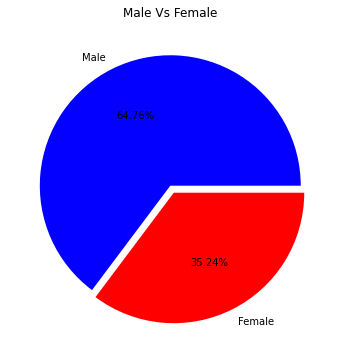

In [ ]:
#Comparing the number of males to females using pie chart :
plt.figure(figsize=(6,6))
plt.title('Male Vs Female')
labels=['Male','Female']
colors = ['#0400ff','#ff0000' ]
explode=(0,0.06)
plt.pie([Male,Female],labels=labels,colors=colors,autopct='%.2f%%',explode=explode)
plt.show



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


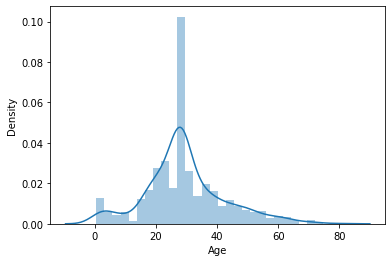

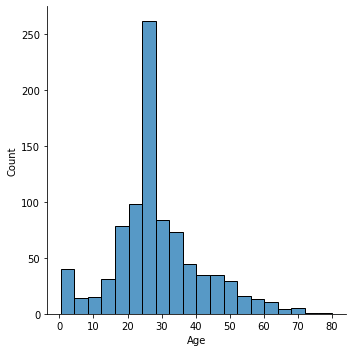

In [ ]:

#Visualizing the age of passengers in titanic
age_dist = sns.distplot(titanic['Age'])
sns.displot(titanic['Age'],bins=20)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


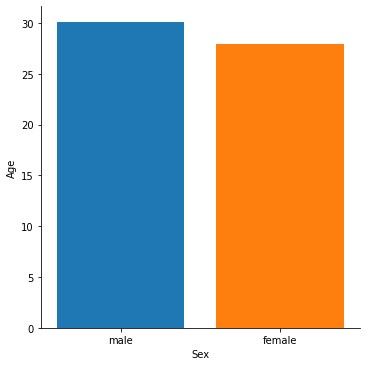

In [ ]:
sns.factorplot(x='Sex', y="Age",data=titanic,saturation=1, dodge=True, ci=None,kind="bar")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


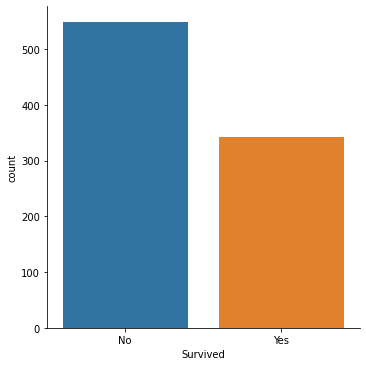

In [ ]:
sns.factorplot('Survived',data=titanic,kind='count')

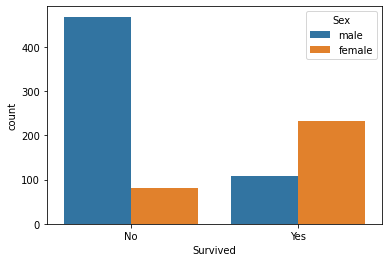

In [ ]:

sns.countplot(x='Survived',hue='Sex',data=titanic)


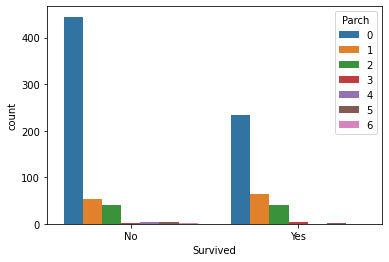

In [ ]:
sns.countplot(x='Survived',hue='Parch',data=titanic)


In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 15 , 15 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

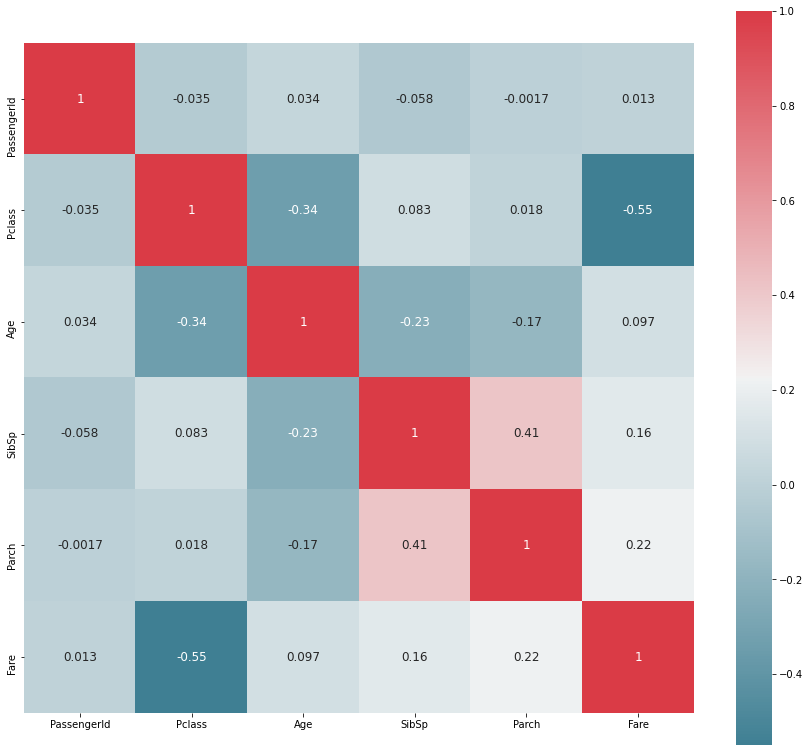

In [ ]:
plot_correlation_map(titanic)

In [ ]:
encoder = LabelEncoder()
titanic['Survived'] =encoder.fit_transform(titanic['Survived']) 
#titanic[['Pclass','Survived']].groupby(['Pclass'],as_index = True ).mean()

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [ ]:
encoder = LabelEncoder()
titanic['Survived'] =encoder.fit_transform(titanic['Survived']) 
titanic[['Pclass','Survived']].groupby(['Pclass'],as_index = True ).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
#Droping the column name :
titanic.drop(['Name'], axis='columns', inplace=True)


In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
Title_Dictionary = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Lady" :      "Royalty",
    "the Countess": "Royalty",
    "Dona":       "Royalty",
    "Mme":        "Miss",
    "Mlle":       "Miss",
    "Miss" :      "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mrs",
    "Mrs" :       "Mrs",
    "Master" :    "Master"

                    }

In [ ]:
lst_of_names = []
def remove():
  for i in range(891):
    name1=titanic['Name'][i]
    new_name=name1.split(" ")[1]
    new_name.split('.')
    lst_of_names.append(new_name)
remove() 
print(lst_of_names)   
    

['Mr.', 'Mr.', 'Mr.', 'Mrs.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mrs.', 'Mr.', 'Miss.', 'Mrs.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Mrs.', 'Mr.', 'Mr.', 'Dr.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Mr.', 'Major.', 'Mrs.', 'Don.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Miss.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Miss.', 'Mr.', 'Master.', 'Dr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mrs.', 'Mrs.', 'Miss.', 'Miss.', 'Master.', 'Miss.', 'Mr.', 'Rev.', 'Mr.', 'Mrs.', 'Mrs.', 'Miss.', 'Mr.', 'Mrs.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Miss.', 'Miss.', 'Miss.', 'Mrs.', 'Master.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Mrs.', 'Mrs.', 'Miss.', 'Mrs.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Mrs.', 'Mr.', 'Mr.', 'Mr.', 'Master.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mrs.', 'Miss.', 'Mr.', 'Mr.', 'Master.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Miss.', 'Mr.', 'Mr.', 'Col.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.', 'Mr.'

In [ ]:
titanic['Title'] = lst_of_names

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mr.
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr.
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mr.
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs.
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs.
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,Mr.
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,Miss.
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,Mr.


In [ ]:
titanic['Title']=titanic['Title']+titanic['Name']

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,"Mr.Collander, Mr. Erik Gustaf"
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,"Mr.Moen, Mr. Sigurd Hansen"
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,"Mr.Jensen, Mr. Hans Peder"
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,"Mrs.Palsson, Mrs. Nils (Alma Cornelia Berglund)"
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,"Mr.Davidson, Mr. Thornton"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"Mrs.Nasser, Mrs. Nicholas (Adele Achem)"
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,"Mr.Sirayanian, Mr. Orsen"
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,"Miss.Cacic, Miss. Marija"
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,"Mr.Petroff, Mr. Pastcho (""Pentcho"")"
